In [1]:
%load_ext autoreload
%autoreload 2
import os, pickle, csv, itertools, shutil, random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torchvision, torch
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format='retina'

import utils.plot_data as plot
import models.transforms as transforms
import algorithms.teaching_algs as algs
import evals.teaching_evals as evals
import utils.gen_triplets as gen
from CV_experiments.utils import *

In [20]:
for fold in ['train', 'valid', 'test']:
    path = os.path.join('/net/scratch/tianh-shared/pneumonia/all',fold, 'NORMAL')
    files = os.listdir(path)
    for f in files:
        src = os.path.join(path, f)
        dst = os.path.join('/net/scratch/tianh-shared/pneumonia/all', '0')
        shutil.copy(src, dst)

    path = os.path.join('/net/scratch/tianh-shared/pneumonia/all',fold, 'PNEUMONIA')
    files = os.listdir(path)
    for f in files:
        src = os.path.join(path, f)
        dst = os.path.join('/net/scratch/tianh-shared/pneumonia/all', '1')
        shutil.copy(src, dst)

In [8]:
utils.auto_split('/net/scratch/tianh-shared/pneumonia/all','/net/scratch/tianh-shared/pneumonia/all')

In [13]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((224,224)),
    # transforms.ToTensor(),
])
dataset = torchvision.datasets.ImageFolder('/net/scratch/tianh-shared/chest_xray/test', transform=transform)

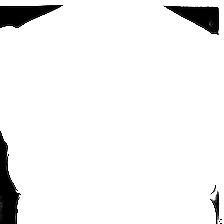

In [14]:
dataset[0][0]

In [42]:
def plot_pairs(X, Y, pairs, title):
    classes = np.unique(Y)
    plt.figure(figsize=(6,4))
    colors = ['b', 'r']
    for c in classes:
        c_idx = np.where(Y==c)[0]
        plt.scatter(X[c_idx][:,0], X[c_idx][:,1])

    for i, pair in enumerate(pairs):
        for x in pair:
            c = Y[x]
            plt.scatter(X[x][0], X[x][1], marker='^', s=300, c=colors[c], alpha=0.7)
            plt.text(X[x][0], X[x][1], str(i), c='k', weight='bold')
    
    plt.title(title)
            
def plot_examples(X, Y, S, title):
    classes = np.unique(Y)
    plt.figure(figsize=(6,4))
    colors = ['b', 'r']
    for c in classes:
        c_idx = np.where(Y==c)[0]
        plt.scatter(X[c_idx][:,0], X[c_idx][:,1])

    for i, s in enumerate(S):
        c = Y[s]
        plt.scatter(X[s][0], X[s][1], marker='^', s=300, c=colors[c], alpha=0.7)
        plt.text(X[s][0], X[s][1], str(i), c='k', weight='bold')
    plt.title(title)

In [48]:
dataset = "bm"
dist = 'prolific'
seeds = np.arange(10)
dist_Ms, zs, y_train, y_test = get_prolific_data(dataset, seeds)
alg = algs.mmd_greedy
paired_zs = [evals.concat_embeds(z, y_train) for z in zs]

TSNEing


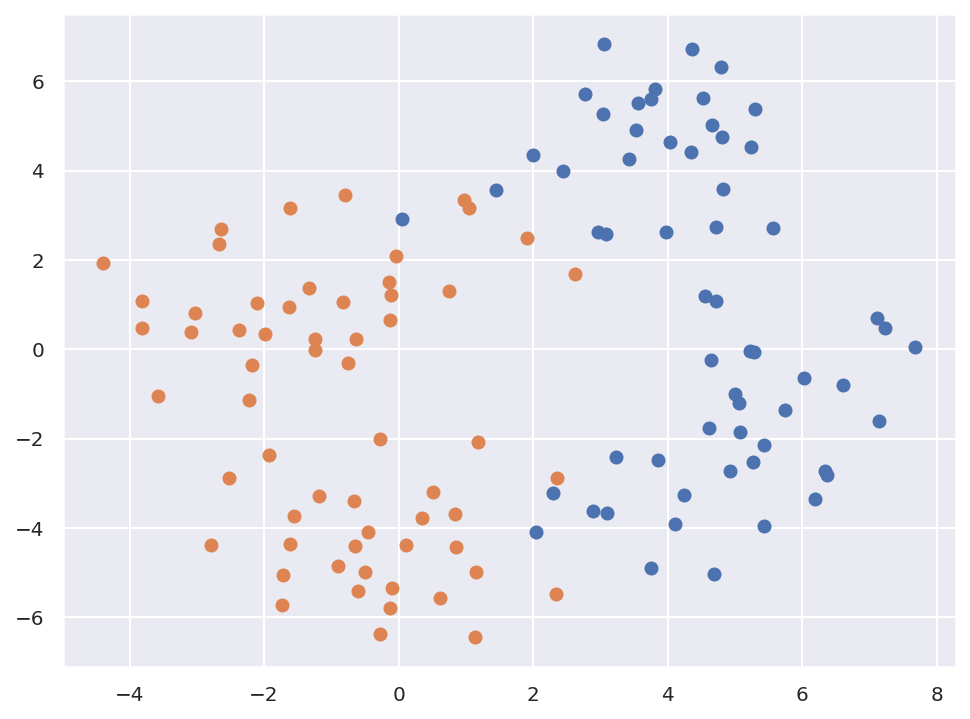

In [49]:
X = plot.plot_data(zs[1],y_train)

In [51]:
m = 3
dist_M = dist_Ms[2]
paired_z, idx = paired_zs[2]
z = zs[2]

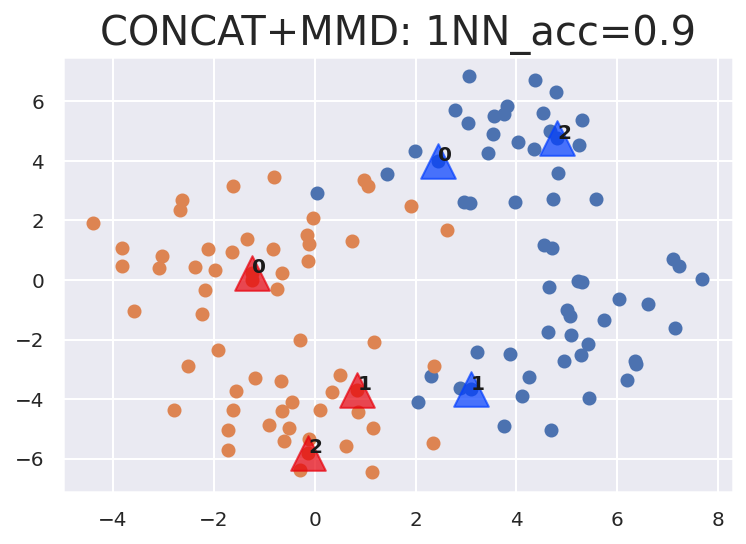

In [52]:
S_pairs = idx[alg(paired_z, m)]
acc = eval_KNN(dist_M, S_pairs.flatten(), y_train, y_test, sim=True)
plot_pairs(X, y_train, S_pairs, f"CONCAT+MMD: 1NN_acc={acc}")

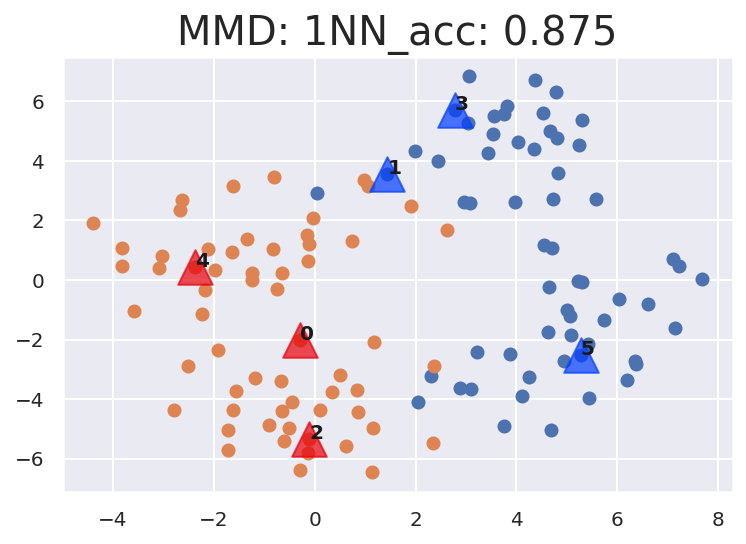

In [54]:
S_single = alg(z, m*2)
acc = eval_KNN(dist_M, S_single, y_train, y_test, sim=True)
plot_examples(X, y_train, S_single, f"MMD: 1NN_acc: {acc}")

0.55